In [1]:
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
file_path_5 = Path("../Resources/clean_suburbs_53.csv")
df_suberbs = pd.read_csv(file_path_5)

df_suberbs.head()

,year,month,suburb,medianSoldPrice,numberSold,highestSoldPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice
0,2011.0,8.0,Randwick,1422000.0,40.0,5450000.0,81.0,8000000.0,775000.0,32.0,20.0,950.0
1,2011.0,11.0,Randwick,1417000.0,49.0,3660000.0,97.0,6000000.0,700000.0,47.0,23.0,880.0
2,2012.0,2.0,Randwick,1520000.0,24.0,6200000.0,62.0,5850000.0,570000.0,10.0,5.0,975.0
3,2012.0,5.0,Randwick,1555000.0,44.0,3325000.0,77.0,3590000.0,570000.0,30.0,17.0,850.0
4,2012.0,8.0,Randwick,1385000.0,27.0,3050000.0,57.0,4250000.0,650000.0,19.0,11.0,825.0


In [3]:
#df_suberbs_clean = df_suberbs.drop_duplicates(subset=['year'])
df_suberbs_clean = df_suberbs.drop_duplicates(subset=['suburb', 'year'])
df_suberbs_clean= df_suberbs_clean.iloc[:, :4]
df_suberbs_clean.head()

,year,month,suburb,medianSoldPrice
0,2011.0,8.0,Randwick,1422000.0
2,2012.0,2.0,Randwick,1520000.0
6,2013.0,2.0,Randwick,1525000.0
10,2014.0,2.0,Randwick,1590000.0
14,2015.0,2.0,Randwick,1820000.0


### Cash rate data cleaning

In [4]:
#clean cash rate data
file_path_1 = Path("../Resources/Cash_rate.csv")
df_cash_rate = pd.read_csv(file_path_1, parse_dates=True)  #, index_col='Date'
df_cash_rate['Date'] = pd.to_datetime(df_cash_rate['Date']).dt.to_period('Y')
df_cash_rate.set_index('Date').resample('Y')
df_cash_rate = df_cash_rate.drop_duplicates(subset=['Date'])
df_cash_rate.rename(columns={'Cash_rate': 'Aus cash rate'})
df_cash_rate = df_cash_rate.set_index('Date')
df_cash_rate.head()

,Cash_rate
Date,
2011,4.75
2012,4.25
2013,3.00
2014,2.50
2015,2.50


### DPIE data cleaning

In [5]:
#clean DPIE data
file_path_4 = Path("../Resources/dpie_nsw_sydney_approvals_monthly.csv")
df_dpie = pd.read_csv(file_path_4, index_col='Year and Month', parse_dates=True, thousands=',') #,header=2, parse_dates=True, index_col='Year and Month'
df_dpie.tail()

,Detached,Unnamed: 2,Unnamed: 3
Year and Month,,,
2021-02-01,1333,NaN,NaN
2021-03-01,1539,NaN,NaN
2021-04-01,1620,NaN,NaN
2021-05-01,1861,NaN,NaN
2021-06-01,1367,NaN,NaN


In [6]:
df_dpie.index.names = ['Date']
df_dpie = df_dpie.reset_index()
df_dpie.head()

,Date,Detached,Unnamed: 2,Unnamed: 3
0,2011-01-01,526,NaN,NaN
1,2011-02-01,779,NaN,NaN
2,2011-03-01,827,NaN,NaN
3,2011-04-01,616,NaN,NaN
4,2011-05-01,731,NaN,NaN


In [7]:
df_dpie.set_index('Date')

,Detached,Unnamed: 2,Unnamed: 3
Date,,,
2011-01-01,526,NaN,NaN
2011-02-01,779,NaN,NaN
2011-03-01,827,NaN,NaN
2011-04-01,616,NaN,NaN
2011-05-01,731,NaN,NaN
...,...,...,...
2021-02-01,1333,NaN,NaN
2021-03-01,1539,NaN,NaN
2021-04-01,1620,NaN,NaN


In [8]:
df_dpie.tail()

,Date,Detached,Unnamed: 2,Unnamed: 3
121,2021-02-01,1333,NaN,NaN
122,2021-03-01,1539,NaN,NaN
123,2021-04-01,1620,NaN,NaN
124,2021-05-01,1861,NaN,NaN
125,2021-06-01,1367,NaN,NaN


In [9]:
df_dpie = df_dpie.iloc[:, :2]
df_dpie = df_dpie.rename(columns={'Detached': 'DPIE data'})
df_dpie['Date'] = pd.to_datetime(df_dpie['Date']).dt.to_period('Y')
df_dpie.set_index('Date').resample('Y')
df_dpie = df_dpie.drop_duplicates(subset=['Date'])
df_dpie = df_dpie.set_index('Date')

In [10]:
df_dpie.head()

,Detached
Date,
2011,526
2012,451
2013,579
2014,919
2015,877


### Exchange rate data cleaning

In [11]:
#cleanse AUD exchange rate
file_path = Path("../Resources/AUD_USD Historical Data.csv")
df_exchange_rates = pd.read_csv(file_path, index_col='Date', parse_dates=True) #
df_exchange_rates.head()

,Price
Date,
2011-01-01,1.0433
2012-01-01,1.0393
2013-01-01,0.8913
2014-01-01,0.8168
2015-01-01,0.7275


In [12]:
# df_exchange_rates = df_exchange_rates.iloc[:,[0]]
df_exchange_rates.head()

,Price
Date,
2011-01-01,1.0433
2012-01-01,1.0393
2013-01-01,0.8913
2014-01-01,0.8168
2015-01-01,0.7275


In [13]:
df_exchange_rates = df_exchange_rates.reset_index()
df_exchange_rates['Date'] =  pd.to_datetime(df_exchange_rates['Date']).dt.to_period('Y')
df_exchange_rates = df_exchange_rates.set_index('Date')
df_exchange_rates.columns = ['AUDUSD']
# df_exchange_rates = df_exchange_rates.drop_duplicates(subset=['Date'])
# df_exchange_rates = df_exchange_rates.set_index('Date')
df_exchange_rates = df_exchange_rates.dropna()
df_exchange_rates.head()

,AUDUSD
Date,
2011,1.0433
2012,1.0393
2013,0.8913
2014,0.8168
2015,0.7275


### CPI data cleaning

In [14]:
#cleanse CPI data
file_path_2 = Path("../Resources/CPI_y_10y_edit.csv")
df_CPI = pd.read_csv(file_path_2, index_col='Date', parse_dates=True)

In [15]:
df_CPI = df_CPI.reset_index()
df_CPI.head(12)

,Date,Sydney_CPI
0,2011-01-01,99.8
1,2012-01-01,102.3
2,2013-01-01,105.0
3,2014-01-01,106.8
4,2015-01-01,108.9
5,2016-01-01,110.9
6,2017-01-01,113.3
7,2018-01-01,115.2
8,2019-01-01,117.1
9,2020-01-01,118.0


In [16]:
df_CPI['Date'] = pd.to_datetime(df_CPI['Date']).dt.to_period('Y')
df_CPI.set_index('Date').resample('Y')

In [17]:
df_CPI.head(12)

,Date,Sydney_CPI
0,2011,99.8
1,2012,102.3
2,2013,105.0
3,2014,106.8
4,2015,108.9
5,2016,110.9
6,2017,113.3
7,2018,115.2
8,2019,117.1
9,2020,118.0


In [18]:
df_CPI = df_CPI.iloc[:11]

In [19]:
df_CPI= df_CPI.set_index('Date')
df_CPI

,Sydney_CPI
Date,
2011,99.8
2012,102.3
2013,105.0
2014,106.8
2015,108.9
2016,110.9
2017,113.3
2018,115.2
2019,117.1


### GDP data cleaning

In [20]:
#Clean GDP data
file_path_3 = Path("../Resources/real_gdp_2011_2021.csv")
df_gdp = pd.read_csv(file_path_3, index_col='Date', parse_dates=True)

In [21]:
df_gdp.head()

,GDP
Date,
2011-01-01,409213.0
2012-01-01,420816.0
2013-01-01,430860.0
2014-01-01,439841.0
2015-01-01,451668.0


In [22]:
df_gdp = df_gdp.reset_index()

In [23]:
df_gdp['Date'] = pd.to_datetime(df_gdp['Date']).dt.to_period('Y')
df_gdp.set_index('Date').resample('Y')

In [24]:
df_gdp= df_gdp.set_index('Date')
df_gdp.head(12)

,GDP
Date,
2011,409213.0
2012,420816.0
2013,430860.0
2014,439841.0
2015,451668.0
2016,464007.0
2017,475384.0
2018,486671.0
2019,497078.0


In [25]:
df_gdp = df_gdp.iloc[:11]
df_gdp.head(12)

,GDP
Date,
2011,409213.0
2012,420816.0
2013,430860.0
2014,439841.0
2015,451668.0
2016,464007.0
2017,475384.0
2018,486671.0
2019,497078.0


### Concat dataframs into one data frame to be used for feature variables

In [26]:
feature_df = pd.concat([df_CPI,df_gdp,df_cash_rate,df_exchange_rates,df_dpie],axis=1)
feature_df.head()

,Sydney_CPI,GDP,Cash_rate,AUDUSD,Detached
Date,,,,,
2011,99.8,409213.0,4.75,1.0433,526
2012,102.3,420816.0,4.25,1.0393,451
2013,105.0,430860.0,3.00,0.8913,579
2014,106.8,439841.0,2.50,0.8168,919
2015,108.9,451668.0,2.50,0.7275,877


### Bring in data from NSW property trend and domain API to uses as target variables

In [28]:
file_path_01 = Path("../Resources/5_random_suberbs.csv")
sub_df_clean = pd.read_csv(file_path_01, parse_dates=True)
sub_df_clean['year'] = sub_df_clean['year'].astype(int)
sub_df_clean.head()

,suburb,Price,year
0,Longueville,3800000.0,2011
1,Longueville,3920000.0,2012
2,Longueville,4300000.0,2013
3,Longueville,4220000.0,2014
4,Longueville,5650000.0,2015


In [29]:
sub_df_clean= sub_df_clean.set_index('year')
sub_df_clean.head()

,suburb,Price
year,,
2011,Longueville,3800000.0
2012,Longueville,3920000.0
2013,Longueville,4300000.0
2014,Longueville,4220000.0
2015,Longueville,5650000.0


In [30]:
Longueville_df = sub_df_clean.iloc[:11]


pyrmont_df = sub_df_clean.iloc[22:33]
pyrmont_df

,suburb,Price
year,,
2011,Pyrmont,1150000.0
2012,Pyrmont,2900000.0
2013,Pyrmont,1610000.0
2014,Pyrmont,1200000.0
2015,Pyrmont,1399000.0
2016,Pyrmont,1630000.0
2017,Pyrmont,1540000.0
2018,Pyrmont,2170000.0
2019,Pyrmont,1020000.0


### Build Random Forest Regressor model

In [31]:
# Define features set
X = feature_df.copy()
X

,Sydney_CPI,GDP,Cash_rate,AUDUSD,Detached
Date,,,,,
2011,99.8,409213.0,4.75,1.0433,526
2012,102.3,420816.0,4.25,1.0393,451
2013,105.0,430860.0,3.00,0.8913,579
2014,106.8,439841.0,2.50,0.8168,919
2015,108.9,451668.0,2.50,0.7275,877
2016,110.9,464007.0,2.00,0.7215,927
2017,113.3,475384.0,1.50,0.7801,816
2018,115.2,486671.0,1.50,0.7049,1060
2019,117.1,497078.0,1.50,0.7021,1094


In [32]:
# Define target vector
y = Longueville_df["Price"].values.reshape(-1, 1)
y


array([[ 3800000.],
       [ 3920000.],
       [ 4300000.],
       [ 4220000.],
       [ 5650000.],
       [ 7600000.],
       [11880000.],
       [ 7500000.],
       [11880000.],
       [ 9400000.],
       [ 8750000.]])

In [33]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [34]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [35]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [36]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# Create the random forest classifier instance
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [38]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [39]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [40]:
# Get the feature importance array
importances = rf_model.feature_importances_

# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.22612727172195968, 'GDP'),
 (0.2215439795088479, ' Detached '),
 (0.20898276688453182, 'Sydney_CPI'),
 (0.20496647121853304, 'Cash_rate'),
 (0.13837951066612755, 'AUDUSD')]

In [41]:
importance_plt = pd.DataFrame(importances_sorted)
importance_plt.columns = ['Value', 'Macro_feature']
importance_plt

,Value,Macro_feature
0,0.226127,GDP
1,0.221544,Detached
2,0.208983,Sydney_CPI
3,0.204966,Cash_rate
4,0.138380,AUDUSD


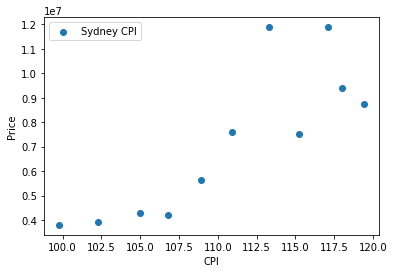

In [42]:
plt.scatter(X['Sydney_CPI'],y, label="Sydney CPI")
plt.xlabel("CPI")
plt.ylabel("Price")
plt.legend(loc='upper left')
plt.show()

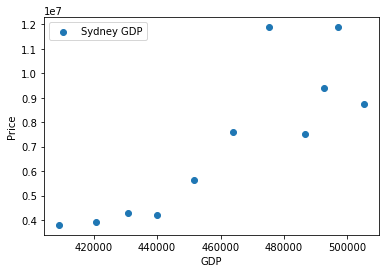

In [43]:
plt.scatter(X['GDP'],y, label="Sydney GDP")
plt.xlabel("GDP")
plt.ylabel("Price")
plt.legend(loc='upper left')
plt.show()

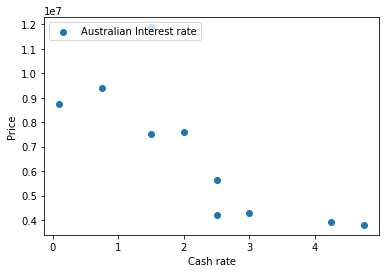

In [44]:
plt.scatter(X['Cash_rate'],y, label="Australian Interest rate")
plt.xlabel("Cash rate")
plt.ylabel("Price")
plt.legend(loc='upper left')
plt.show()

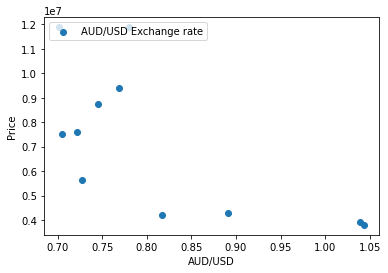

In [45]:
plt.scatter(X['AUDUSD'],y, label="AUD/USD Exchange rate")
plt.xlabel("AUD/USD")
plt.ylabel("Price")
plt.legend(loc='upper left')
plt.show()

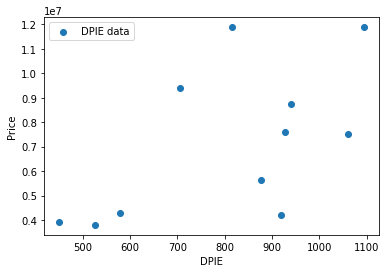

In [46]:
plt.scatter(X[' Detached '],y, label="DPIE data")
plt.xlabel("DPIE")
plt.ylabel("Price")
plt.legend(loc='upper left')
plt.show()

### Train a neural network model to predict whether house prices will rise or fall

In [47]:
 # Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(126)

In [48]:
# Define features data
X = feature_df.copy()
X.head()

,Sydney_CPI,GDP,Cash_rate,AUDUSD,Detached
Date,,,,,
2011,99.8,409213.0,4.75,1.0433,526
2012,102.3,420816.0,4.25,1.0393,451
2013,105.0,430860.0,3.00,0.8913,579
2014,106.8,439841.0,2.50,0.8168,919
2015,108.9,451668.0,2.50,0.7275,877


In [49]:
# Define target data
y = Longueville_df["Price"].values
y = y.reshape(-1, 1)
y[:5]

array([[3800000.],
       [3920000.],
       [4300000.],
       [4220000.],
       [5650000.]])

In [50]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [51]:
# Create the scaler instance
X_scaler = StandardScaler()

In [52]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [53]:
StandardScaler()

StandardScaler()

In [54]:
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# Define the model
number_inputs = 5
number_hidden_nodes = 69

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))

In [56]:
# Compile model
nn.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

In [57]:
# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 952ms/step - loss: 66821268963328.0000 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 66821268963328.0000 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 66821268963328.0000 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 66821268963328.0000 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 66821268963328.0000 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 66821268963328.0000 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 66821268963328.0000 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 66821260574720.0000 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 66821264769024

<AxesSubplot:>

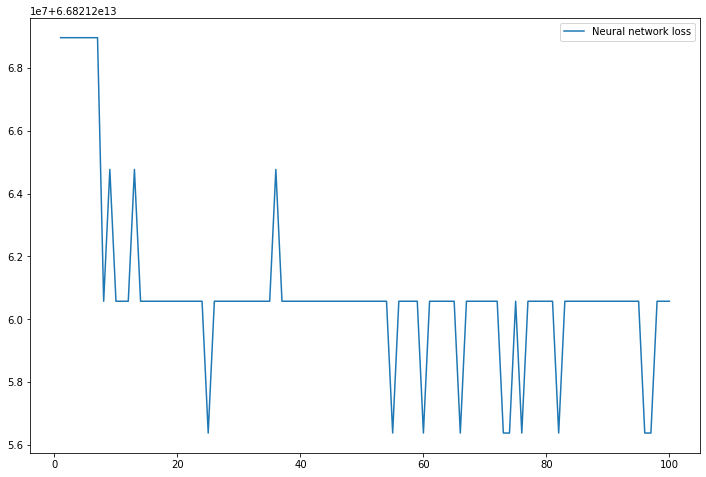

In [58]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss", label = "Neural network loss", figsize=(12,8))

In [59]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 41552789372928.0000 - accuracy: 0.0000e+00
Loss: 41552789372928.0, Accuracy: 0.0


In [60]:
# Define the model
number_inputs = 5
number_hidden_nodes = 120

nn_2 = Sequential()
nn_2.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn_2.add(Dense(units=1, activation="hard_sigmoid"))

In [61]:
# Compile model
nn_2.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

In [62]:
 # Fit the model
model_2 = nn_2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 652ms/step - loss: 66821264769024.0000 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 66821268963328.0000 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 66821264769024.0000 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 66821264769024.0000 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 66821260574720.0000 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 66821260574720.0000 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 66821260574720.0000 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 66821260574720.0000 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 66821260574720.

In [65]:
 # Evaluate the model fit with linear dummy data
model_loss_2, model_accuracy_2 = nn_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss_2}, Accuracy: {model_accuracy_2}")

1/1 - 0s - loss: 41552793567232.0000 - accuracy: 0.0000e+00
Loss: 41552793567232.0, Accuracy: 0.0


<AxesSubplot:>

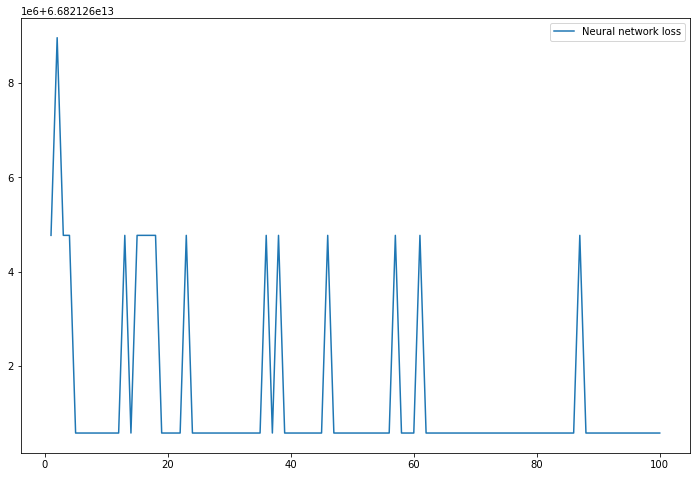

In [66]:
# Create a dataframe with the history dictionary
df_plot_2 = pd.DataFrame(model_2.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot_2.plot(y="loss", label = "Neural network loss", figsize=(12,8))

In [67]:
print("MSE tells, how close a regression line from predicted points. And this is done simply by taking distance from point to the regression line and squaring them. The squaring is a must so it’ll remove the negative sign problem.")
print(f"Model 1 Loss: {model_loss}, Model 2 Loss: {model_loss_2}")

print("Model 1 has the lowest MSE at ", min(model_loss, model_loss_2), "by " ,model_loss_2 - model_loss)
print("This is not a good model")

MSE tells, how close a regression line from predicted points. And this is done simply by taking distance from point to the regression line and squaring them. The squaring is a must so it’ll remove the negative sign problem.
Model 1 Loss: 41552789372928.0, Model 2 Loss: 41552793567232.0
Model 1 has the lowest MSE at  41552789372928.0 by  4194304.0
This is not a good model
